# Ejercicio 1: *Clustering*

### 1. Importa los datos

Importa el dataset *drugLibTrain_raw.csv*. Se trata de un *dataset* con diferentes fármacos, sus efectos y ratings de los clientes.

In [77]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score


In [78]:
data = pd.read_csv("data/drugLibTrain_raw.csv")
data.head(10)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
5,propecia,1,Ineffective,Severe Side Effects,hair loss,"after taking propecia for over a year, startin...","Low sex drive, before i started taking this dr...",one pill once daily
6,vyvanse,9,Highly Effective,Mild Side Effects,add,"My mood has noticably improved, I have more en...","a few experiences of nausiea, heavy moodswings...",I had began taking 20mg of Vyvanse for three m...
7,elavil,10,Considerably Effective,No Side Effects,depression,Although this drug was originally prescribed f...,None.,"One a day, taken about an hour before bedtime."
8,xanax,10,Highly Effective,No Side Effects,panic disorder,This simply just works fast and without any of...,I really don't have any side effects other tha...,I first started taking this at 3 times per day...
9,claritin,1,Ineffective,Extremely Severe Side Effects,allergies,none - did nothing to help allergies. i just h...,I had some horrifying mental and physical side...,took one 10 mg pill nightly.


### 2. Análisis descriptivo

Quedate únicamente con las columnas que podamos manejar: columnas numéricas y columnas categoricas con pocas categorias (menos de 10).

In [79]:
display(data.info(), data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 194.3+ KB


None

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,502,NaN,5,5,1426,3031,2813,3046
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df = data[['rating', 'effectiveness', 'sideEffects']]

In [81]:
data.effectiveness.value_counts()

effectiveness
Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: count, dtype: int64

In [82]:
data.sideEffects.value_counts()

sideEffects
Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: count, dtype: int64

### 3. Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [83]:
df = pd.get_dummies(df, columns=['effectiveness', 'sideEffects'], dtype=int)

In [84]:
df

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1
2,10,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,0,1,0,0,0,0,1,0,0,0
3103,1,0,0,1,0,0,1,0,0,0,0
3104,2,0,0,0,1,0,0,0,1,0,0
3105,8,1,0,0,0,0,0,1,0,0,0


In [85]:
#from sklearn import preprocessing

#le= preprocessing.LabelEncoder()

#le.fit(['Highly Effective','Considerably Effective', 'Moderately Effective', 'Marginally Effective', 'Ineffective'])
#df['effectiveness_dum']=le.transform(df['effectiveness'])

### 4. Construye un algoritmo *K-Means* 

Evalua cual es el mejor valor de *k*. Utiliza `silhouette_score` para evaluar cual es la mejor $k$.

In [99]:
ks = []
silhouettes = []
inertias = []

for k in list(range(2,30)):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df)
    ks.append(k)
    sil = silhouette_score(df, kmeans.labels_)
    ine = kmeans.inertia_
    inertias.append(ine)
    silhouettes.append(sil)
    print("K:", k, "Silhouettes:", sil, "Inertias:", ine)



K: 2 Silhouettes: 0.6055089618561077 Inertias: 9743.174036708004
K: 3 Silhouettes: 0.4381585450078779 Inertias: 6257.991747379041
K: 4 Silhouettes: 0.39705280988017827 Inertias: 4828.184199997186
K: 5 Silhouettes: 0.38842725965854547 Inertias: 4303.964163443525
K: 6 Silhouettes: 0.3673618361948951 Inertias: 3831.1070649383246
K: 7 Silhouettes: 0.3772000181524037 Inertias: 3462.263747605289
K: 8 Silhouettes: 0.39779536617934874 Inertias: 3227.5993999053553
K: 9 Silhouettes: 0.40593882285032945 Inertias: 2992.484064767891
K: 10 Silhouettes: 0.4192295645529037 Inertias: 2851.9524027299453
K: 11 Silhouettes: 0.4200539070990699 Inertias: 2626.9658758594387
K: 12 Silhouettes: 0.4585668595748451 Inertias: 2523.665964988273
K: 13 Silhouettes: 0.4894225235948119 Inertias: 2389.089196688508
K: 14 Silhouettes: 0.4621876422965194 Inertias: 2301.564345443712
K: 15 Silhouettes: 0.5138754419068728 Inertias: 2210.952230763757
K: 16 Silhouettes: 0.48036379667873563 Inertias: 2136.63961850051
K: 17 Silh

In [100]:
dict = {"ks": ks, "silhouettes": silhouettes, "inertias": inertias}
pd.DataFrame(dict)

,ks,silhouettes,inertias
0,2,0.605509,9743.174037
1,3,0.438159,6257.991747
2,4,0.397053,4828.184200
3,5,0.388427,4303.964163
4,6,0.367362,3831.107065
5,7,0.377200,3462.263748
6,8,0.397795,3227.599400
7,9,0.405939,2992.484065
8,10,0.419230,2851.952403
9,11,0.420054,2626.965876


Comprueba los resultados y muestra en un *pie plot* la distribución de los distintos *clusters*.

In [101]:
kmeans1 = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans1.fit(df)
pred = kmeans1.predict(df)
pred

array([1, 1, 0, ..., 1, 0, 1])

In [104]:
pd.DataFrame(pred).value_counts()

0
0    2287
1     820
Name: count, dtype: int64

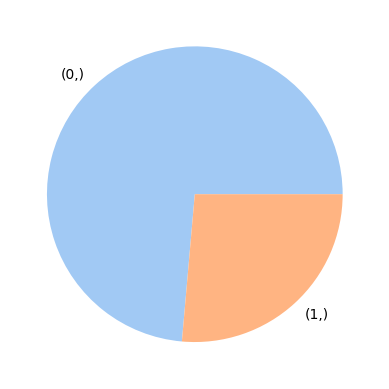

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn color palette to plot pie chart
colors = sns.color_palette('pastel')

# create pie chart using matplotlib
plt.pie(pd.DataFrame(pred).value_counts(), labels=pd.DataFrame(pred).value_counts().index, colors=colors)
plt.show()